In [49]:
import pandas as pd
df = pd.read_csv('dane_wiki_final.csv')
df.info()
# errors in this row - looks like sentence is cut to one word only, list has length 1
df = df.drop(index=1528)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2439 entries, 0 to 2438
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            2439 non-null   int64 
 1   term                  2439 non-null   object
 2   response_gpt3         2439 non-null   object
 3   pos_gpt3              2439 non-null   object
 4   response_gpt4         2439 non-null   object
 5   pos_gpt4              2439 non-null   object
 6   wiki_response_gpt3    2439 non-null   object
 7   wiki_pos_gpt3         2439 non-null   object
 8   wiki_response_gpt4    2439 non-null   object
 9   wiki_pos_gpt4         2439 non-null   object
 10  response_orca         2439 non-null   object
 11  pos_orca              2439 non-null   object
 12  wiki_response_orca    2439 non-null   object
 13  wiki_pos_orca         2439 non-null   object
 14  prompt                2439 non-null   object
 15  response_falcon       2439 non-null   

In [50]:
text_columns = ["response_gpt3",  "wiki_response_gpt3", "response_gpt4", "wiki_response_gpt4", "response_orca", "wiki_response_orca",
               "response_falcon", "wiki_response_falcon", "response_llama", "wiki_response_llama", "response_llama3", 
               "wiki_response_llama3", "wiki_text_y", "sumy", "bart_sum", "text", "wiki_text", "ts_sum", "gensim_sum"]
#text_columns = ["response_gpt3",  "wiki_response_gpt3", "response_gpt4", "wiki_response_gpt4", "response_orca", "wiki_response_orca",
#               "response_falcon", "wiki_response_falcon", "response_llama", "wiki_response_llama", "response_llama3", 
#               "wiki_response_llama3", "wiki_text_y", "bart_sum", "gensim_sum"]

text_columns_renamed = {
    'response_gpt3': 'GPT3', 
    'wiki_response_gpt3': 'wiki_GPT3',
    'response_gpt4':'GPT4',
    'wiki_response_gpt4': 'wiki_GPT4',
    'response_orca':'Orca', 
    'wiki_response_orca': 'wiki_Orca', 
    'response_falcon': 'Falcon',
    'wiki_response_falcon': 'wiki_Falcon', 
    'response_llama':'Llama',
    'wiki_response_llama':'wiki_Llama', 
    'response_llama3':'Llama3',
    'wiki_response_llama3':'wiki_Llama3',
    'wiki_text_y': 'Wikipedia', 
    'bart_sum': 'Bart', 
    'gensim_sum' : 'Gensim'}

df_text = df[text_columns]

df_text = df.rename(columns=text_columns_renamed)

In [51]:
import os

# save sample of data to be used in thesis
sample_text = 'sample_text.csv'
sample_df_text = df_text.iloc[0:1].to_csv(sample_text, index=False)

MAL

Paragraph - Sentence - Word - Syllable - Phoneme

In [52]:
from helpers.TextManipulations import split_text_into_sentences
from helpers.TextManipulations import perform_text_preprocessing
from algorithms.MAL.MAL import create_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import perform_word_split
from algorithms.MAL.MAL import create_words_length_in_sentence_dict
from algorithms.MAL.MAL import count_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict_single
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import print_sorted
from algorithms.MAL.MAL import perform_syllable_split
from algorithms.MAL.MAL import create_words_length_in_sentence_dict
from algorithms.MAL.MAL import count_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict_single
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import perform_phoneme_split
from algorithms.MAL.MAL import count_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict_single
from algorithms.MAL.MAL import average_sentences_length_in_paragraph_dict
from algorithms.MAL.MAL import find_A_b_numerically_truncated
from algorithms.MAL.MAL import find_A_b_numerically_full



def perform_mal(paragraphs)-> float:
    #print("Paragraphs")
    #print(paragraphs)
    sentences = [split_text_into_sentences(element) for element in paragraphs]
    #print("Sentences")
    #print(sentences)
    sentences_normalized = [[perform_text_preprocessing(string) for string in inner_list] for inner_list in sentences]
    #print("Sentences Normalized")
    #print(sentences_normalized)
    sentences_dict = create_sentences_length_in_paragraph_dict(sentences_normalized)
    #print("Sentences Dict")
    #print(sentences_dict)
    sentences_dict_split = perform_word_split(sentences_dict)
    #print("sentences_dict_split")
    #print(sentences_dict_split)
    words_dict = create_words_length_in_sentence_dict(sentences_dict_split)
    words_dict.pop(0, None) # remove sentence of length zero if encountered
    #print("words_dict")
    #print(words_dict)
    sentences_dict_split_counted = count_sentences_length_in_paragraph_dict(sentences_dict_split) 
    #print("sentences_dict_split_counted")
    #print(sentences_dict_split_counted)
    sentences_dict_split_counted_average_single = average_sentences_length_in_paragraph_dict_single(sentences_dict_split_counted) 

    # Level 1: Paragraph - Sentence - Word (X_1, Y_1)
    X_1_Y_1 = average_sentences_length_in_paragraph_dict(sentences_dict_split_counted_average_single) 
    # print_sorted(X_1_Y_1)
    # Level 2: Sentence - Word - Syllable (X_2, Y_2)
    words_dict_split = perform_syllable_split(words_dict)
    syllables_dict = create_words_length_in_sentence_dict(words_dict_split) 
    words_dict_split_counted = count_sentences_length_in_paragraph_dict(words_dict_split) 
    words_dict_split_counted_average_single = average_sentences_length_in_paragraph_dict_single(words_dict_split_counted) 
    X_2_Y_2 = average_sentences_length_in_paragraph_dict(words_dict_split_counted_average_single) 
    # print_sorted(X_2_Y_2)
    syllables_dict_split = perform_phoneme_split(syllables_dict)
    syllables_dict_split_counted = count_sentences_length_in_paragraph_dict(syllables_dict_split) 

    # Level 3: Word - Syllable - Phoneme (X_3, Y_3)
    syllables_dict_split_counted_average_single = average_sentences_length_in_paragraph_dict_single(syllables_dict_split_counted) 
    X_3_Y_3 = average_sentences_length_in_paragraph_dict(syllables_dict_split_counted_average_single) 
    #print_sorted(X_3_Y_3)

    a_1, b_1 = find_A_b_numerically_truncated(X_1_Y_1)
    #print(b_1)
    a_2, b_2 = find_A_b_numerically_truncated(X_2_Y_2)
    #print(b_2)
    a_3, b_3 = find_A_b_numerically_truncated(X_3_Y_3)
    #print(b_3)

    D_trun = 3 / (b_1 + b_2 + b_3)

    a_1, b_1, c_1 = find_A_b_numerically_full(X_1_Y_1)
    #print(b_1)
    a_2, b_2, c_2 = find_A_b_numerically_full(X_2_Y_2)
    #print(b_2)
    a_3, b_3, c_3 = find_A_b_numerically_full(X_3_Y_3)
    #print(b_3)

    D_full = 3 / (b_1 + b_2 + b_3)
    return D_trun, D_full

In [53]:
def clean_and_convert_to_list(series):
    nonan_series = series.dropna()
    result = nonan_series.astype(str).values.flatten().tolist()
    return result

In [54]:
D_trun_s, D_full_s = zip(*[perform_mal(clean_and_convert_to_list(df[column])) for column in text_columns])
print(D_trun_s)
print(D_full_s)

(6.404149499500585, 5.977239634507113, 4.732852441037013, 4.042234639900908, 5.197240390553588, 6.72046814468616, 5.749383467880658, 4.37634041657105, 5.544868104382724, 4.9898998534522585, 6.75646849982078, 6.546958862637973, 3.8554672095588325, 3.046422087016577, 3.1053898002112623, 4.010035296555223, 4.032069899904233, 4.010017786995811, 9.76366967544636)
(10.380447886058695, 8.667673620361839, 6.150417698575358, 23.793152902247726, 22.604182815510335, 21.228156815608052, 11.498428813435982, 18.954215014914155, 7.319623839563802, 6.670372388175474, 10.313542713966383, 9.056722192216574, 24.000855946340533, 3.496229110226355, 6.203884252681171, 8.019160840023664, 5.149737204256622, 6.897033178717224, 19.525979741230625)


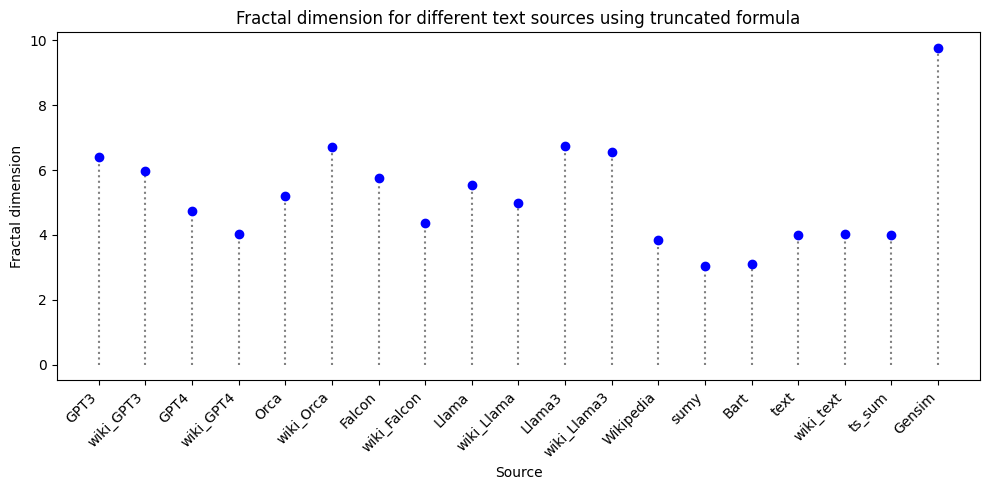

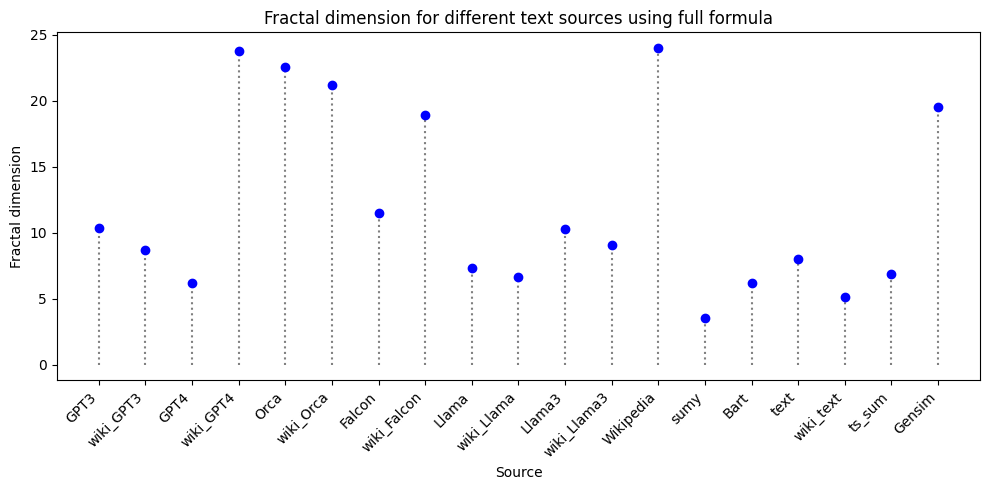

In [57]:
import matplotlib.pyplot as plt

def plot_scatter(D_s, text_coulmns, title, algorithm):
    plt.figure(figsize=(10, 5))
    plt.scatter(range(len(D_s)), D_s, color='blue', zorder=5)

    plt.xticks(range(len(text_coulmns)), [text_columns_renamed.get(key, key) for key in text_coulmns], rotation=45, ha="right")

    plt.xlabel('Source')
    plt.ylabel('Fractal dimension')
    plt.title(title)
    
    for i, label in enumerate(text_coulmns):
        plt.vlines(i, ymin=0, ymax=D_s[i], colors='gray', linestyles='dotted')

    plt.tight_layout()
    plt.savefig(f'dane_wiki_final_{algorithm}.png')
    plt.show()

plot_scatter(D_trun_s, text_columns, 'Fractal dimension for different text sources using truncated formula', 'MAL')
plot_scatter(D_full_s, text_columns, 'Fractal dimension for different text sources using full formula', 'MAL')

Partition Data

In [58]:
def apply_MAL_in_partitions(df, text_columns, partition_length, perform_mal):
    results = {}
    for column in text_columns:
        column_nonan = df[column].fillna('')
        col_values = clean_and_convert_to_list(df[column])      

        partitions = [col_values[i:i + partition_length] for i in range(0, len(col_values), partition_length)]

        for idx, partition in enumerate(partitions):
            results[(column, idx)] = perform_mal(partition)
    return results

In [59]:
partition_length = 700
D_s = apply_MAL_in_partitions(df, text_columns, partition_length, perform_mal)
print(D_s)

{('response_gpt3', 0): (8.730690688978589, 23.051228714354185), ('response_gpt3', 1): (5.496897375834206, 21.63507170192403), ('response_gpt3', 2): (5.374776811893175, 6.663331370479608), ('response_gpt3', 3): (3.352279620181975, 6.704382763837508), ('wiki_response_gpt3', 0): (4.716614328820366, 25.06996090515754), ('wiki_response_gpt3', 1): (6.409256228710981, 19.424468941682523), ('wiki_response_gpt3', 2): (5.430349608519487, 20.16407006363102), ('wiki_response_gpt3', 3): (7.070749593117808, 12.574255811811621), ('response_gpt4', 0): (3.053684512768856, 14.001015378932138), ('response_gpt4', 1): (4.758225521778447, 6.106865232493707), ('response_gpt4', 2): (5.451200395147599, 26.378876113062635), ('response_gpt4', 3): (3.4398185396650076, 4.754516275788339), ('wiki_response_gpt4', 0): (3.6708482119960264, 7.343950363794586), ('wiki_response_gpt4', 1): (3.5462803634376905, 7.0922555875030895), ('wiki_response_gpt4', 2): (4.255921218322795, 5.647716704016796), ('wiki_response_gpt4', 3)

In [60]:
import matplotlib.pyplot as plt

def bar_plot(results):
    plt.figure(figsize=(12, 6))
    labels = [f"{col}_part{i}" for col, i in results.keys()]
    values = list(results.values())

    plt.bar(range(len(results)), values, color='blue', alpha=0.7)
    plt.xlabel('Partition')
    plt.ylabel('Result from MAL')
    plt.title('Results of MAL Applied to Partitions of Columns')
    plt.xticks(range(len(results)), labels, rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [62]:
#bar_plot(D_s)

Data with pos to list transformation

In [ ]:
#pos_columns = ["pos_gpt3", "wiki_pos_gpt3", "pos_gpt4", "wiki_pos_gpt4", "pos_orca", "wiki_pos_orca", "pos_falcon",
#               "wiki_pos_falcon", "pos_llama", "wiki_pos_llama", "pos_llama3", "wiki_pos_llama3", "text_pos", "sumy_pos",
#              "bart_pos", "ts_pos", "gensim_pos"]

pos_columns = ["pos_gpt3", "wiki_pos_gpt3", "pos_gpt4", "wiki_pos_gpt4", "pos_orca", "wiki_pos_orca", "pos_falcon",
               "wiki_pos_falcon", "pos_llama", "wiki_pos_llama", "pos_llama3", "wiki_pos_llama3", "text_pos",
              "bart_pos", "gensim_pos"]

dict_pos_to_response = {
    "pos_gpt3": "response_gpt3",
    "wiki_pos_gpt3": "wiki_response_gpt3",
    "pos_gpt4":"response_gpt4",
    "wiki_pos_gpt4":"wiki_response_gpt4",
    "pos_orca":"response_orca",
    "wiki_pos_orca":"wiki_response_orca",
    "pos_falcon":"response_falcon",
    "wiki_pos_falcon":"wiki_response_falcon",
    "pos_llama":"response_llama",
    "wiki_pos_llama":"wiki_response_llama",
    "pos_llama3":"response_llama3",
    "wiki_pos_llama3":"wiki_response_llama3",
    "text_pos":"text",
    "bart_pos":"bart_sum",
    "gensim_pos":"gensim_sum"
}

pos_df = df[pos_columns]
pos_df.info()

In [ ]:
import ast

# util function to convert list in a cell to python list
def convert_to_list(cell):
    try:
        return ast.literal_eval(cell)
    except (ValueError, SyntaxError):
        return cell

pos_df_list = pos_df.applymap(convert_to_list) 
pos_df_list.info()

Utility functions

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def box_plot(df, algorithm):
    plt.figure(figsize=(17, 12))
    df.boxplot()
    plt.title(f'Hurst exponent for different text sources calculated using {algorithm}')
    plt.xlabel('Source')
    plt.ylabel('Hurst exponent')
    plt.xticks(rotation=45)  # Rotate column labels if needed
    plt.savefig(f'Box_plot_{algorithm}.png')
    plt.show()

In [ ]:
import numpy as np

def find_outliers(df, bound_limit):
    outliers_dict = {}
    median_dict = {}
    for col in df.columns:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - bound_limit * IQR
        upper_bound = Q3 + bound_limit * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index.tolist()
        outliers_dict[col] = outliers
    return outliers_dict

In [ ]:
def print_outliers(df, outliers):
    for col, outlier_indices in outliers.items():
        print(f"Column {col} outlier indices: {outlier_indices}")
        print(f"Column {col} outlier values pos: {df[col][outlier_indices].tolist()}")
        print(f"Column {col} outlier values text: {df[dict_pos_to_response.get(col)][outlier_indices].tolist()}")

DFA (each cell separately)

In [ ]:
from helpers.TimeSeries import construct_its
from algorithms.DFA.DFA import perform_dfa

def dfa_calculate_cell(cell, ranges):
    if len(cell) == 0:
        print(f'Cell {cell} has been evaluated to list length 0')
        return None
    its = construct_its(cell)
    estimated_h = perform_dfa(its, ranges)
    return estimated_h

In [ ]:
import os

h_df_filename_dfa = 'h_df_dfa.csv'

def load_or_create_h_df_filename_dfa(pos_df_list):
    if os.path.exists(h_df_filename_dfa):
        h_df = pd.read_csv(h_df_filename_dfa)
    else:
        h_df = pos_df_list.applymap(lambda x: dfa_calculate_cell(x, [70, 75, 80, 85, 90, 95, 100, 110, 120, 130, 140, 150, 160, 170]))   
        h_df.to_csv(h_df_filename_dfa, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [ ]:
h_df_dfa = load_or_create_h_df_filename_dfa(pos_df_list)
h_df_dfa.info()
h_df_dfa.head()

In [ ]:
outliers = find_outliers(h_df_dfa, 3)
print_outliers(df, outliers)

In [ ]:
box_plot(h_df_dfa, 'DFA')

AFA

In [ ]:
from helpers.TimeSeries import construct_its
from algorithms.AFA.AFA import perform_afa

def afa_calculate_cell(cell, ranges):
    if len(cell) == 0:
        print(f'Cell {cell} has been evaluated to list length 0')
        return None
    its = construct_its(cell)
    estimated_h = perform_afa(its, ranges)
    return estimated_h

In [ ]:
import os

h_df_filename_afa = 'h_df_afa.csv'

def load_or_create_h_df_filename_afa(pos_df_list):
    if os.path.exists(h_df_filename_afa):
        h_df = pd.read_csv(h_df_filename_afa)
    else:
        h_df = pos_df_list.applymap(lambda x: afa_calculate_cell(x, [60, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120, 130, 140]))    
        h_df.to_csv(h_df_filename_afa, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [ ]:
h_df_afa = load_or_create_h_df_filename_afa(pos_df_list)
h_df_afa.info()
h_df_afa.head()

In [ ]:
outliers = find_outliers(h_df_afa, 1)
print_outliers(df, outliers)

In [ ]:
box_plot(h_df_afa, 'AFA')

RRA

In [ ]:
from helpers.TimeSeries import normalize
from algorithms.RRA.RRA import perform_rra

def rra_calculate_cell(cell):
    if len(cell) == 0:
        print(f'Cell {cell} has been evaluated to list length 0')
        return None
    its = construct_its(cell)
    ts_normalized = normalize(cell)
    estimated_h = perform_rra(its, ts_normalized)
    return estimated_h

In [ ]:
h_df_filename_rra = 'h_df_rra.csv'

def load_or_create_h_df_filename_rra(pos_df_list):
    if os.path.exists(h_df_filename_rra):
        h_df = pd.read_csv(h_df_filename_rra)
    else:
        h_df = pos_df_list.applymap(rra_calculate_cell)   
        h_df.to_csv(h_df_filename_rra, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [ ]:
h_df_rra = load_or_create_h_df_filename_rra(pos_df_list)
h_df_rra.info()
h_df_rra.head()

In [ ]:
outliers = find_outliers(h_df_rra, 2.5)
print_outliers(df, outliers)

In [ ]:
box_plot(h_df_rra, 'RRA')

Same as above but on combined cells

DFA

In [ ]:
def merge_lists(pos_df_list):
    pos_df_list_combined = pd.DataFrame()
    for col in pos_df_list.columns:
        temp = []
        for cell_value in pos_df_list[col]:
            temp.extend(cell_value)
        pos_df_list_combined[col] = [temp]
    return pos_df_list_combined
        
pos_df_list_combined = merge_lists(pos_df_list)
pos_df_list_combined.info()


In [ ]:
h_df_filename_dfa_combined = 'h_df_dfa_combined.csv'

def load_or_create_h_df_filename_dfa_combined(pos_df_list):
    if os.path.exists(h_df_filename_dfa_combined):
        h_df = pd.read_csv(h_df_filename_dfa_combined)
    else:
        h_df = pos_df_list.applymap(lambda x: dfa_calculate_cell(x, [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]))   
        h_df.to_csv(h_df_filename_dfa_combined, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [ ]:
h_df_dfa_combined = load_or_create_h_df_filename_dfa_combined(pos_df_list_combined)
h_df_dfa_combined.info()
h_df_dfa_combined.head()

In [ ]:
plot_scatter(h_df_dfa_combined.values.flatten().tolist(), pos_columns, 'DFA Hurst exponent for different text sources, combined input', 'DFA')

AFA

In [ ]:
h_df_filename_afa_combined = 'h_df_afa_combined.csv'

def load_or_create_h_df_filename_afa_combined(pos_df_list):
    if os.path.exists(h_df_filename_afa_combined):
        h_df = pd.read_csv(h_df_filename_afa_combined)
    else:
        h_df = pos_df_list.applymap(lambda x: afa_calculate_cell(x, [100, 150, 200, 250, 300, 350, 400, 500, 600, 700, 750, 800, 900, 1000, 1100, 1200]))   
        h_df.to_csv(h_df_filename_afa_combined, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [ ]:
h_df_afa_combined = load_or_create_h_df_filename_afa_combined(pos_df_list_combined)
h_df_afa_combined.info()
h_df_afa_combined.head()

In [ ]:
plot_scatter(h_df_afa_combined.values.flatten().tolist(), pos_columns, 'AFA Hurst exponent for different text sources, combined input', 'AFA')

RRA

In [ ]:
from helpers.TimeSeries import construct_its
import os

h_df_filename_rra_combined = 'h_df_rra_combined.csv'

def load_or_create_h_df_filename_rra_combined(pos_df_list):
    if os.path.exists(h_df_filename_rra_combined):
        h_df = pd.read_csv(h_df_filename_rra_combined)
    else:
        h_df = pos_df_list.applymap(rra_calculate_cell)   
        h_df.to_csv(h_df_filename_rra_combined, index=False)
        print("DataFrame created and saved to file.")
    return h_df

In [ ]:
h_df_rra_combined = load_or_create_h_df_filename_rra_combined(pos_df_list_combined)
h_df_rra_combined.info()
h_df_rra_combined.head()

In [ ]:
plot_scatter(h_df_rra_combined.values.flatten().tolist(), pos_columns, 'RRA Hurst exponent for different text sources, combined input', 'RRA')